# Intro

In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt
from luminosity import surface_brightness
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

To have an idea of what we've loaded, I plot the surface brightness of the star particles for a couple of bands, after having centered the snap on the star particles family.

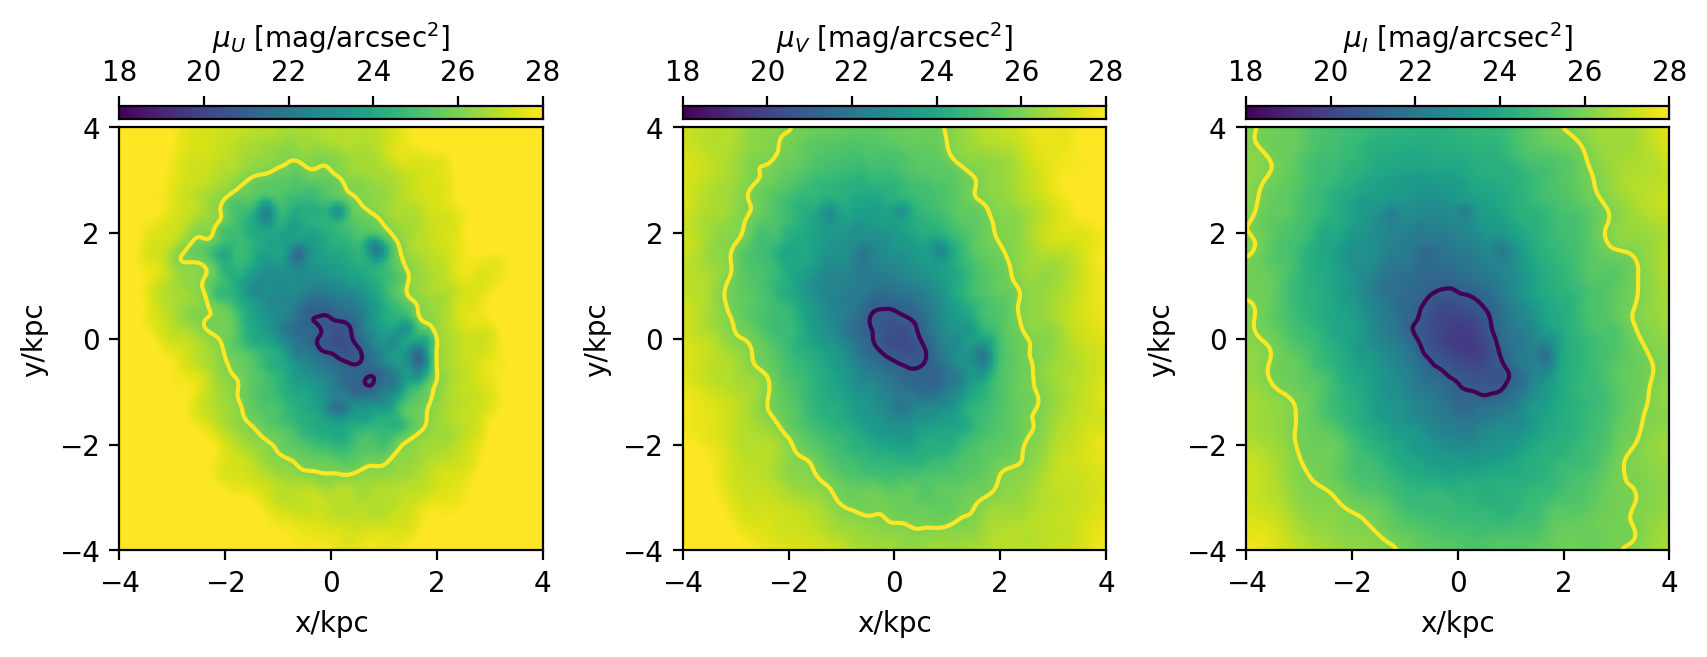

In [3]:
pynbody.analysis.halo.center(s.star)
fig = plt.figure(figsize=(10, 4), dpi=200)
grid = AxesGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.7, label_mode="all",
                cbar_mode="each", cbar_location="top", cbar_size="3%", cbar_pad="2%")
for i, band in enumerate(['u','v','i']):
    surface_brightness(s.star, band=band, width=8, resolution=500,
                       isophotes=(21, 26), label_contour=False, gaussian_sigma=0.1,
                       subplot=grid[i], cax=grid.cbar_axes[i], vmin=18, vmax=28)

The $21$ and $26$ mag/arcsec$^2$ isophotes have been drawn

# To get the overall magnitude of the galaxy

To mimic a SED we can use `halo_mag`. It computes the magnitude in the given band for each star passed in simulation, converts those magnitudes back to luminosities, adds the luminosities, then converts luminosity back to magnitudes.

In [4]:
pynbody.analysis.luminosity.halo_mag(s, band='v')

SimArray(-17.41188933)

In [5]:
bands_available = ['u', 'b', 'v', 'r', 'i', 'j', 'h', 'k']

The central wavelength for the given bands (taken from [here](http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?mode=browse&gname=Generic&gname2=Johnson) and [here](https://en.wikipedia.org/wiki/Photometric_system) for h, k): 

In [6]:
wavelength_avail = {'u':3571, 'b':4378, 'v':5466, 'r':6695, 
                    'i':8565, 'j':12101, 'h':16300, 'k':21900} # in Angstrom

In [7]:
from pynbody.analysis.luminosity import halo_mag
sed = np.array([halo_mag(s, band=b) for b in bands_available])

In [8]:
sed

array([-17.0963406 , -16.96353734, -17.41188933, -17.79478102,
       -18.23468466, -19.25796539, -19.99519745, -20.16518732])

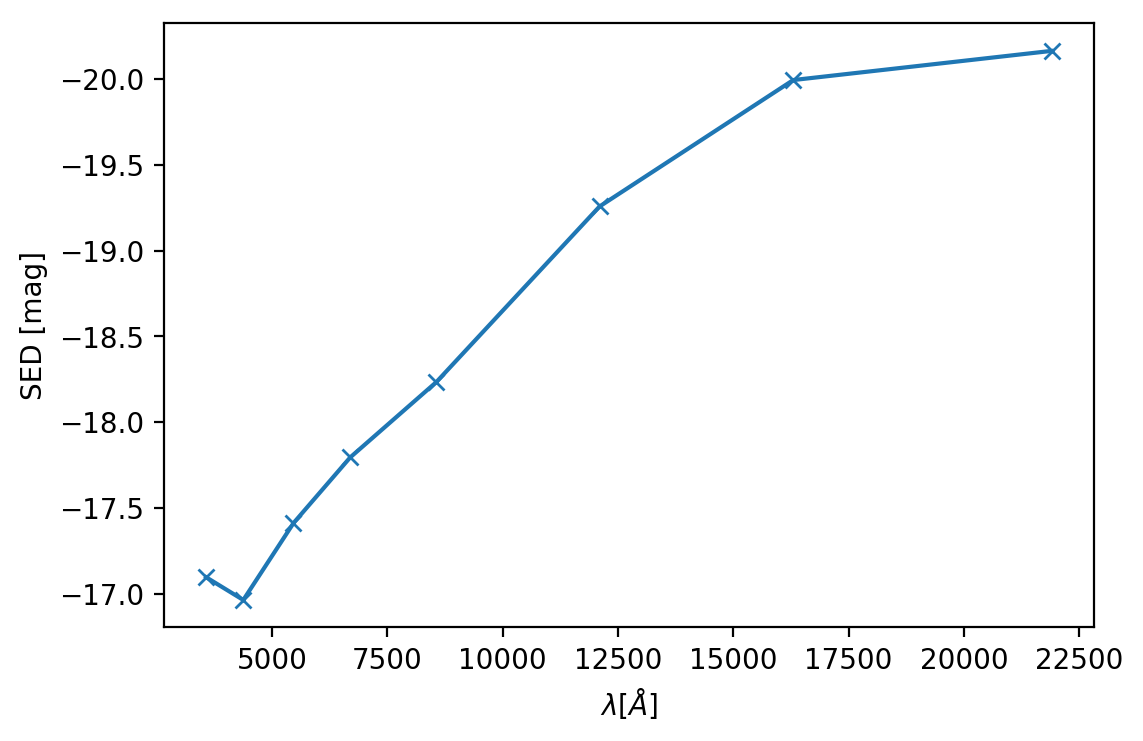

In [9]:
fig, ax = plt.subplots(dpi=200)
wavelengths = np.array([wavelength_avail[band] for band in bands_available])
ax.plot(wavelengths, sed, 'x-');
ax.invert_yaxis()
ax.set_xlabel("$\lambda [\AA]$")
ax.set_ylabel("SED [mag]");

The star formation history of this galaxy:

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaM0'=3.09e-01
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'omegaL0'=6.91e-01
  name, value), RuntimeWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'a'=1.00e+00
  name, value), RuntimeWarning)


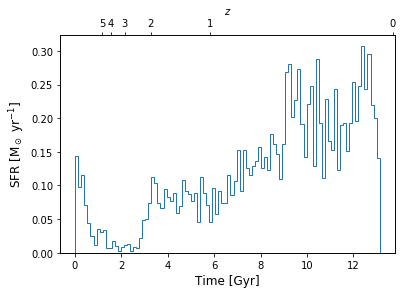

In [10]:
pynbody.plot.sfh(s.s);

## Comments on the implementation

The filter used are the Johson+Bessel (UBVRIJHK) defined [here](http://stev.oapd.inaf.it/cmd_3.0/photsys.html) and [here](http://iopscience.iop.org/article/10.1086/499158/pdf). Also I found the filter profile curves [here](http://www.aip.de/en/research/facilities/stella/instruments/data/johnson-ubvri-filter-curves).

I did a quick study on the tables used for computing the magnitudes. Below some details of the tables. Magnitudes are computed interpolating on the tables using the metallicity and the age of the star particles. The function in `pynbody` package which does the interpolation is `pynbody.analysis.luminosity.calc_mags`. Some code below is taken from there.

In [11]:
import os
lumfile = os.path.join(os.path.dirname(pynbody.analysis.__file__), "cmdlum.npz")

In [12]:
lums = np.load(lumfile)

In [13]:
list(lums.keys())

['mets', 'b', 'i', 'h', 'k', 'j', 'ages', 'r', 'u', 'v']

In [14]:
lums['ages']

array([3.98e+06, 4.47e+06, 5.01e+06, 5.62e+06, 6.31e+06, 7.08e+06,
       7.94e+06, 8.91e+06, 1.00e+07, 1.12e+07, 1.26e+07, 1.41e+07,
       1.58e+07, 1.78e+07, 2.00e+07, 2.24e+07, 2.51e+07, 2.82e+07,
       3.16e+07, 3.55e+07, 3.98e+07, 4.47e+07, 5.01e+07, 5.62e+07,
       6.31e+07, 7.08e+07, 7.94e+07, 8.91e+07, 1.00e+08, 1.12e+08,
       1.26e+08, 1.41e+08, 1.58e+08, 1.78e+08, 2.00e+08, 2.24e+08,
       2.51e+08, 2.82e+08, 3.16e+08, 3.55e+08, 3.98e+08, 4.47e+08,
       5.01e+08, 5.62e+08, 6.31e+08, 7.08e+08, 7.94e+08, 8.91e+08,
       1.00e+09, 1.12e+09, 1.26e+09, 1.41e+09, 1.58e+09, 1.78e+09,
       2.00e+09, 2.24e+09, 2.51e+09, 2.82e+09, 3.16e+09, 3.55e+09,
       3.98e+09, 4.47e+09, 5.01e+09, 5.62e+09, 6.31e+09, 7.08e+09,
       7.94e+09, 8.91e+09, 1.00e+10, 1.12e+10, 1.26e+10, 1.41e+10])

In [15]:
lums['mets']

array([0.0001, 0.0002, 0.0008, 0.002 , 0.004 , 0.006 , 0.008 , 0.01  ,
       0.012 , 0.014 , 0.015 , 0.016 , 0.017 , 0.018 , 0.019 , 0.02  ,
       0.021 , 0.022 , 0.024 , 0.026 , 0.028 , 0.03  ])

In [16]:
print(lums['b'].shape)
lums['b']

(22, 72)


array([[1.9579999, 1.786    , 2.1010001, ..., 6.4310002, 6.5450001,
        6.75     ],
       [2.1140001, 2.0710001, 1.9809999, ..., 6.5380001, 6.633667 ,
        6.7361674],
       [1.788    , 1.706    , 1.75     , ..., 6.7270231, 6.837081 ,
        6.9549999],
       ...,
       [0.16     , 0.299    , 0.597    , ..., 8.54     , 8.6470003,
        8.7419996],
       [0.156    , 0.295    , 0.592    , ..., 8.5780001, 8.684    ,
        8.7810001],
       [0.152    , 0.291    , 0.588    , ..., 8.6120005, 8.7150002,
        8.8149996]])

Maybe we can add the SDSS filters to pynbody since they are defined in the Padova library. Or we can use the MILES library... This requires a bit of work though.